#World Happiness

This notebook contains our Capstone Data Science Project examining 



## Loading Data

In [17]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import mlflow

# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# source https://github.com/dhaitz/matplotlib-stylesheets

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

RSEED = 10


warnings.filterwarnings('ignore')

df=pd.read_csv('../data/DataForTable2.1WHR2023.txt')

#### Data has been loaded into variable "df" and now let's look inside the data

In [18]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [19]:
df.columns


Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [20]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479227,9.389760,0.810681,63.294582,0.747847,0.000091,0.745208,0.652148,0.271493
std,4.718736,1.125527,1.153402,0.120953,6.901104,0.140137,0.161079,0.185835,0.105913,0.086872
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000,0.179000,0.083000
25%,2010.000000,4.647000,8.500000,0.747000,59.120000,0.656250,-0.112000,0.688000,0.572000,0.208000
50%,2014.000000,5.432000,9.499000,0.836000,65.050000,0.770000,-0.023000,0.800000,0.663000,0.261000
75%,2018.000000,6.309500,10.373500,0.905000,68.500000,0.859000,0.092000,0.869000,0.738000,0.323000
max,2022.000000,8.019000,11.664000,0.987000,74.475000,0.985000,0.703000,0.983000,0.884000,0.705000


In [21]:
len(df.columns)

11

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [23]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479227,9.389760,0.810681,63.294582,0.747847,0.000091,0.745208,0.652148,0.271493
std,4.718736,1.125527,1.153402,0.120953,6.901104,0.140137,0.161079,0.185835,0.105913,0.086872
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000,0.179000,0.083000
25%,2010.000000,4.647000,8.500000,0.747000,59.120000,0.656250,-0.112000,0.688000,0.572000,0.208000
50%,2014.000000,5.432000,9.499000,0.836000,65.050000,0.770000,-0.023000,0.800000,0.663000,0.261000
75%,2018.000000,6.309500,10.373500,0.905000,68.500000,0.859000,0.092000,0.869000,0.738000,0.323000
max,2022.000000,8.019000,11.664000,0.987000,74.475000,0.985000,0.703000,0.983000,0.884000,0.705000


_**...replacing spaces in the column names**_

In [24]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower( )


In [25]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

In [26]:
df_eda = df[['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices','perceptions_of_corruption']]

In [27]:
df_eda

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.882
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.850
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.707
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.731
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.776
...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,0.844
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,0.831
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.789
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,0.757


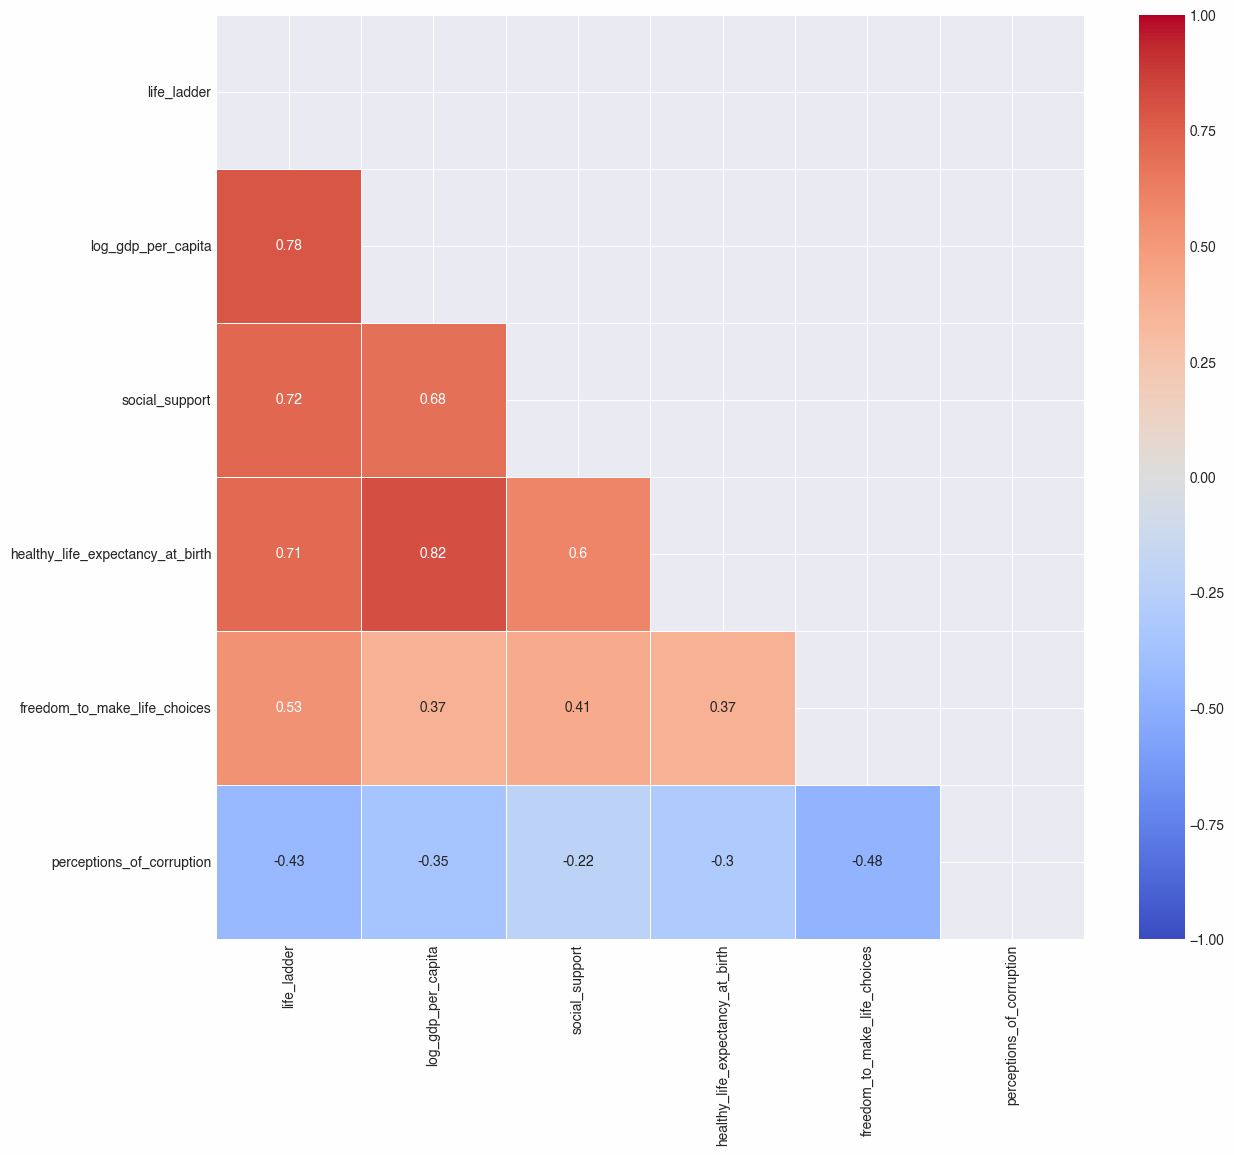

In [28]:
corr_columns=['life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices',
       'perceptions_of_corruption']
corr_mtrx=df_eda[corr_columns].corr(numeric_only=True)
plt.figure(figsize = (14,12))
mask = np.triu(corr_mtrx)
ax = sns.heatmap(corr_mtrx, vmax=1, vmin=-1, linewidths=.5,mask= mask, annot=True, cmap='coolwarm')

In [29]:
df_eda.social_support.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2194    False
2195    False
2196    False
2197    False
2198    False
Name: social_support, Length: 2199, dtype: bool

##### Summary:
- **There are ll columnst (10 features plus our target variable, 'life_ladder'.)**
- **2199 Rows or observations in total.**
- **Missing values  in columns**
    - log_gdp_per_capita
    - social_support
    - healthy_life_expectancy_at_birth'
    - freedom_to_make_life_choices'
    - generosity'
    - perceptions_of_corruption
    - positive_affect 
    - negative_affect
- **Do we have any duplicates?**
- **In which rows are the values missing?**

In [30]:
#how many duplicates?
df.duplicated().value_counts()

False    2199
Name: count, dtype: int64

_...No,there are no duplicated rows._

In [31]:
df.sort_values(by='social_support',ascending=False)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
1404,New Zealand,2015,7.418,10.622,0.987,69.900,0.942,0.324,0.186,0.795,0.160
830,Iceland,2022,7.449,10.935,0.985,72.075,0.936,0.222,0.692,0.768,0.178
825,Iceland,2016,7.510,10.909,0.985,71.925,0.952,0.276,0.719,0.808,0.158
2004,Turkmenistan,2018,4.621,9.569,0.984,62.000,0.858,0.259,NaN,0.567,0.189
894,Ireland,2008,7.568,10.939,0.983,69.860,0.894,0.317,0.487,0.745,0.148
...,...,...,...,...,...,...,...,...,...,...,...
1602,Qatar,2015,6.375,11.532,NaN,66.400,NaN,NaN,NaN,NaN,NaN
1966,Tunisia,2009,5.025,9.238,NaN,66.220,0.781,-0.124,0.722,NaN,NaN
2045,United Arab Emirates,2014,6.540,11.072,NaN,65.340,NaN,NaN,NaN,NaN,NaN
2072,United States,2007,7.513,10.931,NaN,66.760,0.872,0.193,0.633,0.756,0.232


In [33]:
#dfs_by_year = {}
 
##for i in np.arange(2005, 2022)
df_top_social_{i}= df.query('year==i) sort_values(by=['year','social_support','country_name'], 
                              ascending =[True,False, True])

SyntaxError: unterminated string literal (detected at line 4) (3969977199.py, line 4)

In [166]:
dfs_by_year = {}

for year in np.arange(2005, 2022):
    # Query the DataFrame for the specific year
    df_year = df.query('year == @year')
    
    # Sort the DataFrame by year, social_support, and country_name
    df_year_sorted = df_year.sort_values(by=['year', 'social_support', 'country_name'],
                                         ascending=[True, False, True])
    
    # Store the sorted DataFrame in the dictionary
    dfs_by_year[f"df_top_social_{year}"] = df_year_sorted
print(list(dfs_by_year.keys())[0:6])


['df_top_social_2005', 'df_top_social_2006', 'df_top_social_2007', 'df_top_social_2008', 'df_top_social_2009', 'df_top_social_2010']


In [37]:
# Unpack the dictionary to retrieve the DataFrames
df_top_social_2005 = dfs_by_year["df_top_social_2005"]
df_top_social_2006 = dfs_by_year["df_top_social_2006"]

In [116]:
df_top_social_2021 = dfs_by_year["df_top_social_2021"]
df_top_social_2020 = dfs_by_year["df_top_social_2020"]


In [117]:
df_top_social_2005.describe()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
count,27.0,27.000000,27.000000,27.000000,27.000000,25.000000,1.000,25.000000,26.000000,26.000000
mean,2005.0,6.446259,10.124222,0.897407,66.825926,0.829520,0.248,0.715880,0.671962,0.255769
std,0.0,0.919129,0.683781,0.084185,4.129033,0.105477,NaN,0.198819,0.088513,0.064453
min,2005.0,4.719000,8.252000,0.591000,53.200000,0.623000,0.248,0.237000,0.479000,0.151000
25%,2005.0,5.539000,9.653000,0.858000,64.750000,0.782000,0.248,0.598000,0.607250,0.233000
50%,2005.0,6.620000,10.454000,0.928000,67.100000,0.847000,0.248,0.745000,0.683000,0.242000
75%,2005.0,7.161500,10.683000,0.953000,70.150000,0.916000,0.248,0.877000,0.757750,0.288000
max,2005.0,8.019000,10.849000,0.979000,72.400000,0.971000,0.248,0.983000,0.803000,0.456000


In [118]:
df_top_social_2005.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 2054 to 1486
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      27 non-null     object 
 1   year                              27 non-null     int64  
 2   life_ladder                       27 non-null     float64
 3   log_gdp_per_capita                27 non-null     float64
 4   social_support                    27 non-null     float64
 5   healthy_life_expectancy_at_birth  27 non-null     float64
 6   freedom_to_make_life_choices      25 non-null     float64
 7   generosity                        1 non-null      float64
 8   perceptions_of_corruption         25 non-null     float64
 9   positive_affect                   26 non-null     float64
 10  negative_affect                   26 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.5+ KB


In [119]:
df_top_social_2006['country_name']

475              Cuba
893           Ireland
623           Finland
2071    United States
1473           Norway
            ...      
671           Georgia
1696     Sierra Leone
1179           Malawi
181             Benin
1950             Togo
Name: country_name, Length: 89, dtype: object

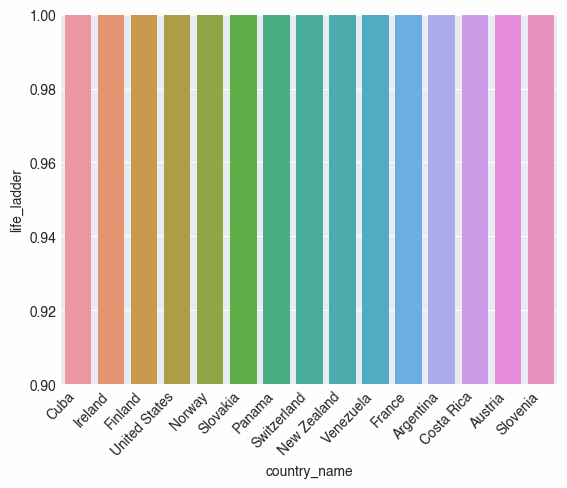

In [120]:
ax= sns.barplot(df_top_social_2006.head(15), x="country_name", y="social_support")
ax.set_xticklabels(ax.get_xticklabels(), rotation=46, horizontalalignment='right')
# Manually set y-axis limits and adjust tick marks
ax.set_ylim(0.9, 1.0)  # Adjust the range of the y-axis
#ax.set_yticks([0.9, 0.91, 0.9, 1.0, 1.1])  # Set custom tick marks
sns.barplot(df_top_social_2006.head(15), x="country_name", y="life_ladder")

plt.show();

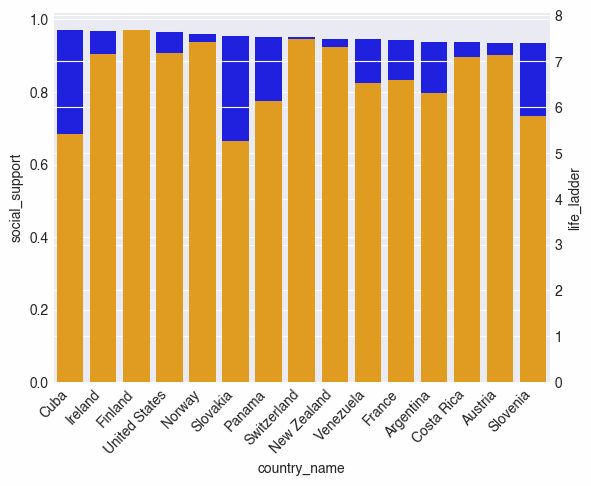

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_top_social_2006 is your DataFrame
# Create a single axis object
fig, ax1 = plt.subplots()
ax2= ax1.twinx()
# Plot the first bar plot for "social_support"
sns.barplot(data=df_top_social_2006.head(15), x="country_name", y="social_support", ax=ax1, color ='blue')

# Rotate x-axis tick labels to 46 degrees and align them towards the right
ax1.set_xticklabels(ax.get_xticklabels(), rotation=46, horizontalalignment='right')

# Manually set y-axis limits and adjust tick marks for "social_support"
#ax.set_ylim(0.9, 1.0)  # Adjust the range of the y-axis

# Plot the second bar plot for "life_ladder" on the same axis
sns.barplot(data=df_top_social_2006.head(15), x="country_name", y="life_ladder", ax=ax2, color='orange')

plt.show()



In [122]:
df_top_social_2020

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
828,Iceland,2020,7.575,10.862,0.983,72.025,0.949,0.153,0.644,0.808,0.172
1011,Kazakhstan,2020,6.168,10.141,0.966,65.400,0.872,-0.060,0.661,0.620,0.150
502,Czechia,2020,6.897,10.562,0.964,68.925,0.906,-0.133,0.884,0.748,0.290
635,Finland,2020,7.889,10.767,0.962,71.075,0.962,-0.121,0.164,0.748,0.193
906,Ireland,2020,7.035,11.420,0.960,71.200,0.882,0.002,0.356,0.753,0.246
...,...,...,...,...,...,...,...,...,...,...,...
1500,Pakistan,2020,4.624,8.518,0.594,57.175,0.767,0.006,0.833,0.470,0.376
1221,Mali,2020,4.269,7.661,0.568,55.000,0.645,-0.065,0.895,0.648,0.440
1332,Morocco,2020,4.803,8.929,0.553,63.800,0.819,-0.235,0.803,0.548,0.256
1115,Lebanon,2020,2.634,9.531,0.547,66.075,0.552,-0.136,0.884,0.352,0.482


In [123]:
import plotly.express as px

fig = px.bar(df_top_social_2021.head(10), x="country_name", y="life_ladder",
             color='social_support', barmode='group',
             #histfunc='avg',
             height=500)
fig.show()

In [124]:
fig = px.bar(df_top_social_2020.head(10), x="country_name", y="life_ladder",
             color='social_support', barmode='group',
             #histfunc='avg',
             height=500)
fig.show()

In [125]:
df_pop= pd.read_csv('../data/world_population_density.csv')

In [126]:
df_world_pop= pd.read_csv('../data/world_population.csv')

In [127]:
df_world_pop

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [128]:
df_world_pop.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [129]:
df_world_pop.columns= df_world_pop.columns.str.replace('/','_')

In [130]:
df_world_pop.columns= df_world_pop.columns.str.lower()

In [131]:


df_world_pop.columns=df_world_pop.columns.str.replace(' ','_')

In [132]:
df_world_pop.columns

Index(['rank', 'cca3', 'country_territory', 'capital', 'continent',
       '2022_population', '2020_population', '2015_population',
       '2010_population', '2000_population', '1990_population',
       '1980_population', '1970_population', 'area_(km²)', 'density_(per_km²)',
       'growth_rate', 'world_population_percentage'],
      dtype='object')

In [133]:
df_world_pop.country_territory.sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'DR Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Falkland Islands', 'Faroe Islands', 'Fiji', 'Finland', 'France',
 

In [134]:
print(df.country_name.nunique())


165


In [135]:
print(df_world_pop.country_territory.nunique())

234


In [136]:
lst_world_pop= df_world_pop.country_territory.sort_values().unique().ravel().tolist()
lst_df= df.country_name.sort_values().unique().ravel().tolist()

In [137]:

print(lst_df)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho

In [138]:
def exclusion(lst_world_pop, lst_df):
    lst = [value for value in lst_world_pop if value not in lst_df]
    return lst

print(len(exclusion(lst_world_pop,lst_df)))
for i in exclusion(lst_world_pop,lst_df):
    print(i)


78
American Samoa
Andorra
Anguilla
Antigua and Barbuda
Aruba
Bahamas
Barbados
Bermuda
British Virgin Islands
Brunei
Cape Verde
Cayman Islands
Cook Islands
Curacao
Czech Republic
DR Congo
Dominica
Equatorial Guinea
Eritrea
Falkland Islands
Faroe Islands
Fiji
French Guiana
French Polynesia
Gibraltar
Greenland
Grenada
Guadeloupe
Guam
Guernsey
Guinea-Bissau
Hong Kong
Isle of Man
Jersey
Kiribati
Liechtenstein
Macau
Marshall Islands
Martinique
Mayotte
Micronesia
Monaco
Montserrat
Nauru
New Caledonia
Niue
North Korea
Northern Mariana Islands
Palau
Palestine
Papua New Guinea
Puerto Rico
Republic of the Congo
Reunion
Saint Barthelemy
Saint Kitts and Nevis
Saint Lucia
Saint Martin
Saint Pierre and Miquelon
Saint Vincent and the Grenadines
Samoa
San Marino
Sao Tome and Principe
Seychelles
Sint Maarten
Solomon Islands
Taiwan
Timor-Leste
Tokelau
Tonga
Turkey
Turks and Caicos Islands
Tuvalu
United States Virgin Islands
Vanuatu
Vatican City
Wallis and Futuna
Western Sahara


In [154]:
def intersection(lst_world_pop, lst_df):
    lst3 = [value for value in lst_world_pop if value  in lst_df]
    return lst3

print(len(intersection(lst_world_pop,lst_df)))
for i in intersection(lst_world_pop,lst_df):
#print(intersection(lst1,lst2))
    print(i)

156
Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Costa Rica
Croatia
Cuba
Cyprus
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Eswatini
Ethiopia
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Roman

change country_territory names in df_world_pop to match  country names in df
'Turkey', 'Turkiye'
'Czech Republic', 'Czechia'
'DR Congo', 'Congo (Kinshasa)'
'Republic of the Congo', 'Congo (Brazzaville)'
'Hong Kong', 'Hong Kong S.A.R. of China'

In [140]:
df_world_pop.replace(to_replace= {'Turkey': 'Turkiye',
                                  'Czech Republic': 'Czechia',
                                  'DR Congo': 'Congo (Kinshasa)',
                                  'Republic of the Congo': 'Congo (Brazzaville)',
                                  'Hong Kong': 'Hong Kong S.A.R. of China'}, inplace=True)

**changed 5 names**

In [141]:
lst_world_pop1= df_world_pop.country_territory.sort_values().unique().ravel().tolist()
lst_df1= df.country_name.sort_values().unique().ravel().tolist()
len(exclusion(lst_world_pop1, lst_df1))

73

In [142]:
df_world_pop.country_territory.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Congo (Kinshasa)',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 

In [143]:
df_world_pop

,rank,cca3,country_territory,capital,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


**what numbers are the basis for the values in the density column?**

from the final year 2022/area

In [144]:
df_new= df_world_pop['density_(per_km²)'] * df_world_pop['area_(km²)']
df_new

0      4.112878e+07
1      2.842321e+06
2      4.490320e+07
3      4.427300e+04
4      7.982400e+04
           ...     
229    1.157201e+04
230    5.759964e+05
231    3.369661e+07
232    2.001767e+07
233    1.632055e+07
Length: 234, dtype: float64

~~**now to place create a dataframe with country (intersection between df & df_world_pop), new rows for each country per year from 2005-2022 (17 rows per country),  population column (transpose the rows into one column), area columns**~~

**make dataframe with only the intersecting countries and save to csv file, then open in google sheets and impute population data there, making a separate table for each year that can be concatenated one on top of the other.**

In [145]:
lst_world_pop1= df_world_pop.country_territory.sort_values().unique().ravel().tolist()
lst_df1= df.country_name.sort_values().unique().ravel().tolist()
print(len(intersection(lst_world_pop1, lst_df1)))
print(intersection(lst_world_pop1, lst_df1))

161
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Li

In [146]:
in_common=intersection(lst_world_pop1, lst_df1)

In [147]:
df_population= df_world_pop[df_world_pop['country_territory'].isin(in_common)]

In [148]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         161 non-null    int64  
 1   cca3                         161 non-null    object 
 2   country_territory            161 non-null    object 
 3   capital                      161 non-null    object 
 4   continent                    161 non-null    object 
 5   2022_population              161 non-null    int64  
 6   2020_population              161 non-null    int64  
 7   2015_population              161 non-null    int64  
 8   2010_population              161 non-null    int64  
 9   2000_population              161 non-null    int64  
 10  1990_population              161 non-null    int64  
 11  1980_population              161 non-null    int64  
 12  1970_population              161 non-null    int64  
 13  area_(km²)               

In [149]:
df_world_pop2=df_population.reset_index(drop=True)

In [150]:
df_world_pop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         161 non-null    int64  
 1   cca3                         161 non-null    object 
 2   country_territory            161 non-null    object 
 3   capital                      161 non-null    object 
 4   continent                    161 non-null    object 
 5   2022_population              161 non-null    int64  
 6   2020_population              161 non-null    int64  
 7   2015_population              161 non-null    int64  
 8   2010_population              161 non-null    int64  
 9   2000_population              161 non-null    int64  
 10  1990_population              161 non-null    int64  
 11  1980_population              161 non-null    int64  
 12  1970_population              161 non-null    int64  
 13  area_(km²)          

In [151]:
###### LASTLY SAVE TO CSV #######
df_world_pop2.to_csv('../data/data_world_pop2.csv', index=False)

In [152]:
df_world_pop_all=pd.read_csv('../data/HappyAlmana_World_ Population_Data - All Years.csv')

In [171]:
len(df_world_pop_all.columns)

23

In [178]:
df_world_pop_all.columns[0:24]

Index(['country_territory', 'continent', '2022_population', '2021_population*',
       '2020_population', '2019_population*', '2018_population*',
       '2017_population*', '2016_population*', '2015_population',
       '2014_population*', '2013_population*', '2012_population*',
       '2011_population*', '2010_population', '2009_population*',
       '2008_population*', '2007_population*', '2006_population*',
       '2005_population*', '2000_population', 'area_(km²)',
       'density_(per_km²)'],
      dtype='object')

In [177]:
years= df_world_pop_all.columns[2:20]
years

Index(['2022_population', '2021_population*', '2020_population',
       '2019_population*', '2018_population*', '2017_population*',
       '2016_population*', '2015_population', '2014_population*',
       '2013_population*', '2012_population*', '2011_population*',
       '2010_population', '2009_population*', '2008_population*',
       '2007_population*', '2006_population*', '2005_population*'],
      dtype='object')

In [ ]:
df_world_pop_2022= df_world_pop_all[['country_territory', 
                                     'continent', '2022_population', 
                                     'area_(km²)',
                                     'density_(per_km²)']]

In [199]:
years=['2022_population', '2021_population*', '2020_population',
       '2019_population*', '2018_population*', '2017_population*',
       '2016_population*', '2015_population', '2014_population*',
       '2013_population*', '2012_population*', '2011_population*',
       '2010_population', '2009_population*', '2008_population*',
       '2007_population*', '2006_population*', '2005_population*']

In [224]:
name_list=[]
for year in years:
    name= 'df_' + str(year)
    name_list.append(name)
print(name_list)

['df_2022_population', 'df_2021_population*', 'df_2020_population', 'df_2019_population*', 'df_2018_population*', 'df_2017_population*', 'df_2016_population*', 'df_2015_population', 'df_2014_population*', 'df_2013_population*', 'df_2012_population*', 'df_2011_population*', 'df_2010_population', 'df_2009_population*', 'df_2008_population*', 'df_2007_population*', 'df_2006_population*', 'df_2005_population*']


In [225]:
print(len(name_list))
name_list[2]

18


'df_2020_population'

In [231]:
df_list = []
name_list
years
for i in years:

    density_columns=['country_territory','continent', 
                          i, 'area_(km²)','density_(per_km²)']
    df_list.append(density_columns)
    #df_density=pd.concat(df_list)
    #print(density_columns)
print(df_list)
print(len(df_list))


[['country_territory', 'continent', '2022_population', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2021_population*', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2020_population', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2019_population*', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2018_population*', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2017_population*', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2016_population*', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2015_population', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2014_population*', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2013_population*', 'area_(km²)', 'density_(per_km²)'], ['country_territory', 'continent', '2012_population*', 'area_(km²)', 'density_(per_km²)'], [

In [241]:
df_x= df_world_pop_all[df_list[2]]
df_x

,country_territory,continent,2020_population,area_(km²),density_(per_km²)
0,Afghanistan,Asia,38972230,652230,63.0587
1,Albania,Europe,2866849,28748,98.8702
2,Algeria,Africa,43451666,2381741,18.8531
3,Angola,Africa,33428485,1246700,28.5466
4,Argentina,South America,45036032,2780400,16.3683
...,...,...,...,...,...
156,Venezuela,South America,28490453,916445,30.8820
157,Vietnam,Asia,96648685,331212,296.4472
158,Yemen,Asia,32284046,527968,63.8232
159,Zambia,Africa,18927715,752612,26.5976


In [248]:
for i in range(18):
   #x=i
    name_list[i]=df_world_pop_all[df_list[i]]
    print(name_list[17])
    

    country_territory      continent  2005_population*  area_(km²)   
0         Afghanistan           Asia        23866327.0      652230  \
1             Albania         Europe         3047710.0       28748   
2             Algeria         Africa        33315482.5     2381741   
3              Angola         Africa        19879123.5     1246700   
4           Argentina  South America        39085448.5     2780400   
..                ...            ...               ...         ...   
156         Venezuela  South America        26571375.5      916445   
157           Vietnam           Asia        83206077.0      331212   
158             Yemen           Asia        21686323.0      527968   
159            Zambia         Africa        11841611.0      752612   
160          Zimbabwe         Africa        12337223.5      390757   

     density_(per_km²)  
0              63.0587  
1              98.8702  
2              18.8531  
3              28.5466  
4              16.3683  
..       

In [250]:
df_2022_density= name_list[0]
df_2021_density= name_list[1]
df_2020_density= name_list[2]
df_2019_density= name_list[3]
df_2018_density= name_list[4]
df_2017_density= name_list[5]
df_2016_density= name_list[6]
df_2015_density= name_list[7]
df_2014_density= name_list[8]
df_2013_density= name_list[9]
df_2012_density= name_list[10]
df_2011_density= name_list[11]
df_2010_density= name_list[12]
df_2009_density= name_list[13]
df_2008_density= name_list[14]
df_2007_density= name_list[15]
df_2006_density= name_list[16]
df_2005_density= name_list[17]

In [251]:
df_2010_density

,country_territory,continent,2010_population,area_(km²),density_(per_km²)
0,Afghanistan,Asia,28189672,652230,63.0587
1,Albania,Europe,2913399,28748,98.8702
2,Algeria,Africa,35856344,2381741,18.8531
3,Angola,Africa,23364185,1246700,28.5466
4,Argentina,South America,41100123,2780400,16.3683
...,...,...,...,...,...
156,Venezuela,South America,28715022,916445,30.8820
157,Vietnam,Asia,87411012,331212,296.4472
158,Yemen,Asia,24743946,527968,63.8232
159,Zambia,Africa,13792086,752612,26.5976


In [255]:
df_test=df_2010_density
df_test['density']=(df_2010_density.iloc[0:160,2])/(df_2010_density.iloc[0:160,3])
df_test

,country_territory,continent,2010_population,area_(km²),density_(per_km²),density
0,Afghanistan,Asia,28189672,652230,63.0587,43.220447
1,Albania,Europe,2913399,28748,98.8702,101.342667
2,Algeria,Africa,35856344,2381741,18.8531,15.054678
3,Angola,Africa,23364185,1246700,28.5466,18.740824
4,Argentina,South America,41100123,2780400,16.3683,14.782090
...,...,...,...,...,...,...
156,Venezuela,South America,28715022,916445,30.8820,31.333055
157,Vietnam,Asia,87411012,331212,296.4472,263.912576
158,Yemen,Asia,24743946,527968,63.8232,46.866374
159,Zambia,Africa,13792086,752612,26.5976,18.325626


In [ ]:
list_pop_density=(df_2022_density,
df_2021_density,
df_2020_density,
df_2019_density,
df_2018_density,
df_2017_density,
df_2016_density,
df_2015_density,
df_2014_density,
df_2013_density,
df_2012_density,
df_2011_density,
df_2010_density,
df_2009_density,
df_2008_density,
df_2007_density,
df_2006_density,
df_2005_density)

**calculating the correct population density per km2 within each individual density dataframe for each year (2005-2022)**

In [260]:
list=[]
for frame in list_pop_density:
    frame['density_(per_km²)']=(frame.iloc[0:160,2])/(frame.iloc[0:160,3])
    list.append(frame)
print(list)
    

[    country_territory      continent  2022_population  area_(km²)   
0         Afghanistan           Asia         41128771      652230  \
1             Albania         Europe          2842321       28748   
2             Algeria         Africa         44903225     2381741   
3              Angola         Africa         35588987     1246700   
4           Argentina  South America         45510318     2780400   
..                ...            ...              ...         ...   
156         Venezuela  South America         28301696      916445   
157           Vietnam           Asia         98186856      331212   
158             Yemen           Asia         33696614      527968   
159            Zambia         Africa         20017675      752612   
160          Zimbabwe         Africa         16320537      390757   

     density_(per_km²)  
0            63.058692  
1            98.870217  
2            18.853110  
3            28.546552  
4            16.368263  
..                 .

In [261]:
df_2005_density

,country_territory,continent,2005_population*,area_(km²),density_(per_km²)
0,Afghanistan,Asia,23866327.0,652230,36.591888
1,Albania,Europe,3047710.0,28748,106.014679
2,Algeria,Africa,33315482.5,2381741,13.987870
3,Angola,Africa,19879123.5,1246700,15.945395
4,Argentina,South America,39085448.5,2780400,14.057491
...,...,...,...,...,...
156,Venezuela,South America,26571375.5,916445,28.993966
157,Vietnam,Asia,83206077.0,331212,251.216976
158,Yemen,Asia,21686323.0,527968,41.075071
159,Zambia,Africa,11841611.0,752612,15.734018


In [262]:
#Checking to see that the population density column was correctly calculated
df_2005_density.iloc[0,2]/df_2005_density.iloc[0,3]

36.59188783097987

**looking to see how i need to format these just-created population density dataframes (*df_year_density*)so that they can be concatenated with the main dataframe df.**

In [263]:
df

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242
